# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [3]:
import pandas as pd

finance = pd.read_csv('../../../PS_20174392719_1491204439457_log.csv')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [28]:
finance = finance.sample(100000)
finance.shape
finance.describe()
finance.head(30)

for column in finance.columns:
    print(column,len(finance[column].unique()))
    
finance.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1, inplace = True)

step 473
type 5
amount 99612
nameOrig 99997
oldbalanceOrg 53827
newbalanceOrig 43124
nameDest 92959
oldbalanceDest 57345
newbalanceDest 61514
isFraud 2
isFlaggedFraud 1


In [31]:
finance = pd.get_dummies(finance)

### What is the distribution of the outcome? 

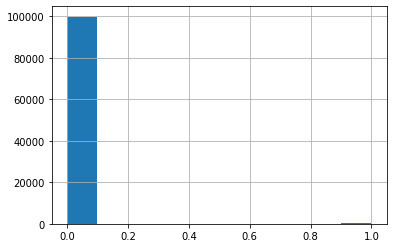

In [9]:
finance.isFraud.hist()
#heavily biased towards is not fraud

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [32]:
finance.isnull().sum()
finance.dtypes
# I see no arm in this column being coded like this.

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

X = finance.drop('isFraud', axis =1)
y = finance.isFraud

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test) #99.8% accuracy but imbalanced model...

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.9985428571428572 precision: 0.4838709677419355 recall: 0.6122448979591837 F1: 0.5405405405405406


### Now pick a model of your choice and evaluate its accuracy.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

y_pred = gboost.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', ac, 'precision:', pr, 'recall:', rc, 'F1:', f1)

accuracy: 0.9992285714285715 precision: 0.8055555555555556 recall: 0.5918367346938775 F1: 0.6823529411764706


### Which model worked better and how do you know?

##### Gradient Boosting works better - Better precision and better F1 score. Recall is slightly worse meaning we have slightly  higher false negatives with GB (same is to say fradulent clients that go unnoticed. If this was the determinant in our bussiness case - detect the most fradulent possible even if more false positives were detected in this single situation Log Reg could be a better model...

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.